<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Script" data-toc-modified-id="Script-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Script</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Train-validation-split" data-toc-modified-id="Train-validation-split-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train validation split</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Xgboost</a></span></li></ul></li></ul></div>

# Description
Reference: https://datahack.analyticsvidhya.com/contest/all/  


**Predict Loan Eligibility for Dream Housing Finance company**
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

**Data Dictionary**
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

| Variable | Description |
| :---|:---|
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female |
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome | Applicant income |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | (Target) Loan approved (Y/N) |


**Evaluation Metric**  
Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.



**Public and Private Split**   
Test file is further divided into Public (25%) and Private (75%)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

# Load the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.plotting.backend = "matplotlib"
pd.set_option('max_columns',100)

import time,os,json
time_start_notebook = time.time()
home = os.path.expanduser('~')
SEED=100

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

[(x.__name__,x.__version__) for x in [np,pd,sns]]

[('numpy', '1.18.4'), ('pandas', '1.1.0'), ('seaborn', '0.10.1')]

In [2]:
import sklearn
import xgboost as xgb

# Load the data

In [3]:
df_train = pd.read_csv('../data/raw/train.csv')
print(df_train.shape)
df_train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test = pd.read_csv('../data/raw/test.csv')
print(df_test.shape)
df_test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_combined = df_train.append(df_test)
df_combined.head(2).append(df_combined.tail(2))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


# Data Processing

## Missing values

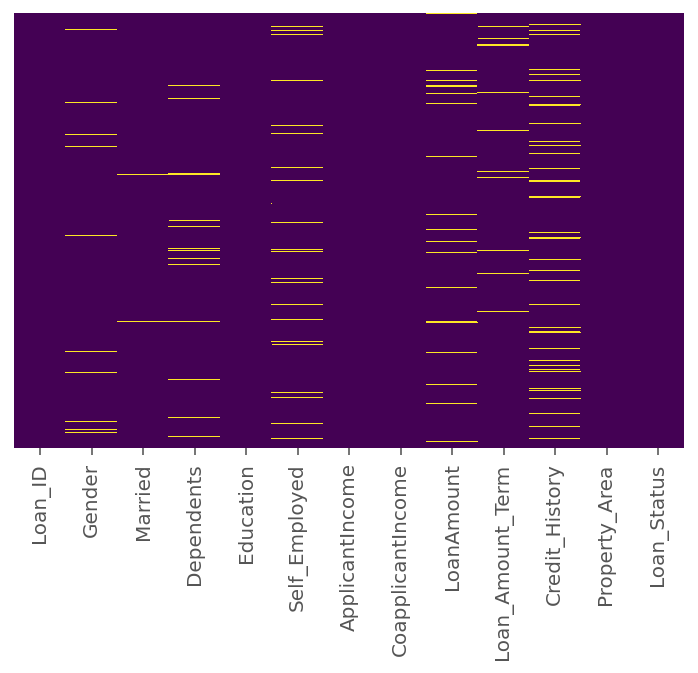

In [6]:
sns.heatmap(df_train.isnull(),cmap='viridis',
            yticklabels=False,cbar=False)

In [7]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df_train.isna().sum().div(len(df_train)).mul(100).round(2)
# credit history have most 8.14% data missing

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [9]:
df_train.nunique().sort_values()

Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
Property_Area          3
Dependents             4
Loan_Amount_Term      10
LoanAmount           203
CoapplicantIncome    287
ApplicantIncome      505
Loan_ID              614
dtype: int64

In [10]:
cols_mode = ['Married', 'Gender', 'Dependents', 'Self_Employed', 'Credit_History']
for c in cols_mode:
    print(c)
    display(df_train[c].value_counts(dropna=False))
    print('='*50)

Married


Yes    398
No     213
NaN      3
Name: Married, dtype: int64

Gender


Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

Dependents


0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

Self_Employed


No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

Credit_History


1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [11]:
df_train['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

## EDA

In [12]:
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Script

In [29]:
def clean_data(df):
    df = df.copy()
    # drop unwanted features
    df = df.drop('Loan_ID',axis=1)

    # missing values imputation
    ## fill with mode
    cols_mode = ['Married', 'Gender', 'Dependents', 'Self_Employed', 'Credit_History']
    for c in cols_mode:
        df[c] = df[c].fillna(df[c].mode()[0])

    ## fill with mean
    cols_mean = ['LoanAmount','Loan_Amount_Term']
    for c in cols_mean:
        df[c] = df[c].fillna(df[c].mean())

    # mapping string to integers
    df['Gender'] = df['Gender'].map({'Male':1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes':1, 'No': 0 })
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No': 0})
    
    
    ## add features
    # this did not help xgboost0.9
#     df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
#     df['DebtIncomeRatio'] = df['TotalIncome'] / df['LoanAmount']

    # data transformation
#     df['LoanAmount_log'] = np.log1p(df['LoanAmount'])
#     df = df.drop('LoanAmount',axis=1)

    # target 
    target = 'Loan_Status'
    if target in df.columns:
        df[target] = df[target].map({'Y':1, 'N': 0})

    # one hot encoding
    cols = ['Dependents','Property_Area']
    df = pd.get_dummies(df,columns=cols,drop_first=True)
    return df

In [30]:
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

df_train = clean_data(df_train)
df_test = clean_data(df_test)

print(df_train.shape)
print(df_test.shape)
df_train.head(2).append(df_train.tail(2))

(614, 15)
(367, 14)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1,0,0,1
613,0,0,1,1,4583,0.0,133.000000,360.0,0.0,0,0,0,0,1,0


In [31]:
df_train.to_csv('../data/processed/train_clean.csv',index=False)

# Modelling

## Train validation split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train_orig = df_train.copy()
target = 'Loan_Status'
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_train_orig.drop(target,axis=1), df_train_orig[target],
    test_size = 0.2,
    random_state=SEED,
    stratify=df_train_orig[target]
)

ytrain = ser_ytrain.to_numpy().ravel()
yvalid = ser_yvalid.to_numpy().ravel()

print(f'train shape: {df_Xtrain.shape}')
print(f'valid shape: {df_Xvalid.shape}')

df_Xtrain.head(2)

train shape: (491, 16)
valid shape: (123, 16)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,DebtIncomeRatio,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
203,1,1,0,0,3500,1083.0,135.0,360.0,1.0,4583.0,33.948148,1,0,0,0,1
369,1,1,1,0,19730,5266.0,570.0,360.0,1.0,24996.0,43.852632,0,0,0,0,0


In [19]:
Xtr = df_Xtrain
ytr = ytrain
Xvd = df_Xvalid
yvd = yvalid

In [20]:
df_eval = pd.DataFrame({
    'Model': [],
    'Description': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F-score': []
})

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [22]:
model = RandomForestClassifier(n_jobs=-1,random_state=SEED)
model.fit(Xtr,ytr)

vd_preds = model.predict(Xvd)

acc = metrics.accuracy_score(yvd, vd_preds)
pre = metrics.precision_score(yvd, vd_preds)
rec = metrics.recall_score(yvd, vd_preds)
f1  = metrics.f1_score(yvd,vd_preds)

row = ['RF', 'default', acc, pre, rec, f1]
df_eval.loc[len(df_eval)] = row
df_eval = df_eval.drop_duplicates(['Model','Description'])
df_eval.sort_values('Accuracy',ascending=False)

,Model,Description,Accuracy,Precision,Recall,F-score
0,RF,default,0.813008,0.81,0.952941,0.875676


In [23]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=SEED)
model.fit(Xtr,ytr)

vd_preds = model.predict(Xvd)

acc = metrics.accuracy_score(yvd, vd_preds)
pre = metrics.precision_score(yvd, vd_preds)
rec = metrics.recall_score(yvd, vd_preds)
f1  = metrics.f1_score(yvd,vd_preds)

row = ['RF', 'n_estimators=500', acc, pre, rec, f1]
df_eval.loc[len(df_eval)] = row
df_eval = df_eval.drop_duplicates(['Model','Description'])
df_eval.sort_values('Accuracy',ascending=False)

,Model,Description,Accuracy,Precision,Recall,F-score
0,RF,default,0.813008,0.81000,0.952941,0.875676
1,RF,n_estimators=500,0.804878,0.80198,0.952941,0.870968


In [24]:
model = RandomForestClassifier(n_estimators=5000, n_jobs=-1,random_state=SEED)
model.fit(Xtr,ytr)

vd_preds = model.predict(Xvd)

acc = metrics.accuracy_score(yvd, vd_preds)
pre = metrics.precision_score(yvd, vd_preds)
rec = metrics.recall_score(yvd, vd_preds)
f1  = metrics.f1_score(yvd,vd_preds)

row = ['RF', 'n_estimators=5000', acc, pre, rec, f1]
df_eval.loc[len(df_eval)] = row
df_eval = df_eval.drop_duplicates(['Model','Description'])
df_eval.sort_values('Accuracy',ascending=False)

,Model,Description,Accuracy,Precision,Recall,F-score
0,RF,default,0.813008,0.810000,0.952941,0.875676
2,RF,n_estimators=5000,0.813008,0.803922,0.964706,0.877005
1,RF,n_estimators=500,0.804878,0.801980,0.952941,0.870968


## Xgboost
Note: default xgboost 0.9 gives accuracy 0.82  
but defautl xgboost 1.1.1 gives accuracy 0.78.
They changed the default parameters.

In [25]:
import xgboost
from xgboost import XGBClassifier

xgboost.__version__

'1.1.1'

In [26]:
model = XGBClassifier(random_state=SEED,n_jobs=-1)

model.fit(Xtr,ytr)
vd_preds = model.predict(Xvd)

acc = metrics.accuracy_score(yvd, vd_preds)
pre = metrics.precision_score(yvd, vd_preds)
rec = metrics.recall_score(yvd, vd_preds)
f1  = metrics.f1_score(yvd,vd_preds)

row = ['XGB', 'default', acc, pre, rec, f1]
df_eval.loc[len(df_eval)] = row
df_eval = df_eval.drop_duplicates(['Model','Description'])
df_eval.sort_values('Accuracy',ascending=False)

,Model,Description,Accuracy,Precision,Recall,F-score
0,RF,default,0.813008,0.810000,0.952941,0.875676
2,RF,n_estimators=5000,0.813008,0.803922,0.964706,0.877005
1,RF,n_estimators=500,0.804878,0.801980,0.952941,0.870968
3,XGB,default,0.780488,0.815217,0.882353,0.847458


In [27]:
# default from xgboost version 0.9
model = XGBClassifier(
    # always same
    tree_method='auto',
    objective='binary:logistic',
    random_state=100,
    n_jobs=-1,
    verbosity=1,
    base_score=0.5,

    # most imp
    n_estimators=100,
    learning_rate=0.1,

    # subsample and colsample
    subsample=1,
    colsample_bylevel=1,
    colsample_bynode=1, 
    colsample_bytree=1,

    # tree depth
    max_depth=3,
    min_child_weight=1,
    scale_pos_weight=1,
    
    # regularizaion alpha lambda gamma
    reg_alpha=0,
    reg_lambda=1,
    gamma=0,
    )

model.fit(Xtr,ytr)
vd_preds = model.predict(Xvd)

acc = metrics.accuracy_score(yvd, vd_preds)
pre = metrics.precision_score(yvd, vd_preds)
rec = metrics.recall_score(yvd, vd_preds)
f1  = metrics.f1_score(yvd,vd_preds)

row = ['XGB', 'default from version 0.9', acc, pre, rec, f1]
df_eval.loc[len(df_eval)] = row
df_eval = df_eval.drop_duplicates(['Model','Description'])
df_eval.sort_values('Accuracy',ascending=False)

,Model,Description,Accuracy,Precision,Recall,F-score
4,XGB,default from version 0.9,0.821138,0.805825,0.976471,0.882979
0,RF,default,0.813008,0.810000,0.952941,0.875676
2,RF,n_estimators=5000,0.813008,0.803922,0.964706,0.877005
1,RF,n_estimators=500,0.804878,0.801980,0.952941,0.870968
3,XGB,default,0.780488,0.815217,0.882353,0.847458


In [28]:
"""
xgb9.0 notes

0.829268 ==> Loan_Amount_Term fillna mean
0.813008 ==> Loan_Amount_Term fillna mode **BAD!!**


""";